<a href="https://colab.research.google.com/github/Matinnorouzi2023/Digital-Twin/blob/main/MLPowered_Pre_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reaing the dataset

In [ ]:
df = pd.read_csv('predictive_maintenance.csv')
df.head(10)


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,1/1/2015,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,1/1/2015,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,1/1/2015,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,1/1/2015,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,1/1/2015,S1F02DZ2,0,116440096,0,378,9,9,407905,0,0,170


In [ ]:
list = []

for count, item in enumerate(df['failure']):
    if item == 1:
        print(count,'----', df['date'][count],'----',item)

4885 ---- 1/5/2015 ---- 1
6879 ---- 1/7/2015 ---- 1
8823 ---- 1/9/2015 ---- 1
11957 ---- 1/13/2015 ---- 1
12668 ---- 1/14/2015 ---- 1
14734 ---- 1/17/2015 ---- 1
15087 ---- 1/18/2015 ---- 1
15773 ---- 1/19/2015 ---- 1
15859 ---- 1/19/2015 ---- 1
15898 ---- 1/19/2015 ---- 1
16223 ---- 1/19/2015 ---- 1
16257 ---- 1/19/2015 ---- 1
16403 ---- 1/19/2015 ---- 1
16420 ---- 1/19/2015 ---- 1
16475 ---- 1/19/2015 ---- 1
16554 ---- 1/20/2015 ---- 1
18231 ---- 1/22/2015 ---- 1
18991 ---- 1/23/2015 ---- 1
19059 ---- 1/23/2015 ---- 1
20817 ---- 1/26/2015 ---- 1
21786 ---- 1/27/2015 ---- 1
22506 ---- 1/28/2015 ---- 1
23103 ---- 1/29/2015 ---- 1
23140 ---- 1/29/2015 ---- 1
26132 ---- 2/2/2015 ---- 1
26157 ---- 2/2/2015 ---- 1
27572 ---- 2/4/2015 ---- 1
27798 ---- 2/4/2015 ---- 1
27803 ---- 2/4/2015 ---- 1
28529 ---- 2/5/2015 ---- 1
31103 ---- 2/9/2015 ---- 1
31125 ---- 2/9/2015 ---- 1
34304 ---- 2/14/2015 ---- 1
37295 ---- 2/18/2015 ---- 1
38346 ---- 2/19/2015 ---- 1
39453 ---- 2/21/2015 ---- 1
40984 

In [ ]:
df['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [ ]:
df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.492706,9.940897,1.741120,14.222669,260172.657726,0.292528,0.292528,13.013848
std,0.029167,7.045933e+07,2179.677781,185.748131,22.908507,15.943028,99151.078547,7.436924,7.436924,275.661220
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,70000.000000


In [ ]:
df.drop_duplicates(inplace = True)

# Device analysis

In [ ]:
df['device_model'] = df['device'].apply(lambda x: x[:4])
df['device_model'].value_counts()

S1F0    33168
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: device_model, dtype: int64

In [ ]:
df['device_seri'] = df['device'].apply(lambda x: x[4:])
df['device_seri'].value_counts()

QLC1    304
KYCR    304
E9EP    304
EGMT    304
FGBQ    304
       ... 
CHZK      5
CJKT      5
4KSC      4
WJFT      3
DA5ÿ      1
Name: device_seri, Length: 1169, dtype: int64

In [ ]:
df.drop("device", axis=1, inplace = True)
df.head()

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,device_model,device_seri
0,1/1/2015,0,215630672,55,0,52,6,407438,0,0,7,S1F0,1085
1,1/1/2015,0,61370680,0,3,0,6,403174,0,0,0,S1F0,166B
2,1/1/2015,0,173295968,0,0,0,12,237394,0,0,0,S1F0,1E6Y
3,1/1/2015,0,79694024,0,0,0,6,410186,0,0,0,S1F0,1JE0
4,1/1/2015,0,135970480,0,0,0,15,313173,0,0,3,S1F0,1R2B


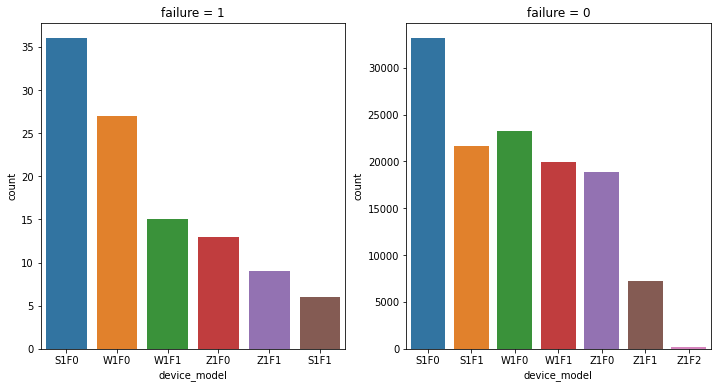

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.countplot(x ='device_model', data = df.loc[df["failure"] == 1])
plt.title('failure = 1')

plt.subplot(1,2,2)
sns.countplot(x ='device_model', data = df.loc[df["failure"] == 0])
plt.title('failure = 0')

plt.show()

In [ ]:
df.drop(df[df['device_model'] == "Z1F2"].index , inplace=True, axis=0)

<AxesSubplot:xlabel='device_seri', ylabel='count'>

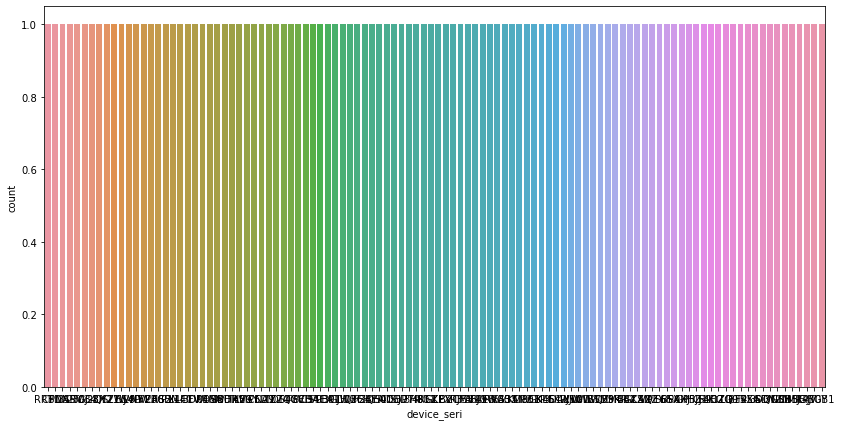

In [ ]:
plt.figure(figsize = (14,7))

sns.countplot(x ='device_seri', data = df.loc[df["failure"] == 1])

In [ ]:
df.drop('device_seri', axis = 1, inplace = True)
df.head()

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,device_model
0,1/1/2015,0,215630672,55,0,52,6,407438,0,0,7,S1F0
1,1/1/2015,0,61370680,0,3,0,6,403174,0,0,0,S1F0
2,1/1/2015,0,173295968,0,0,0,12,237394,0,0,0,S1F0
3,1/1/2015,0,79694024,0,0,0,6,410186,0,0,0,S1F0
4,1/1/2015,0,135970480,0,0,0,15,313173,0,0,3,S1F0


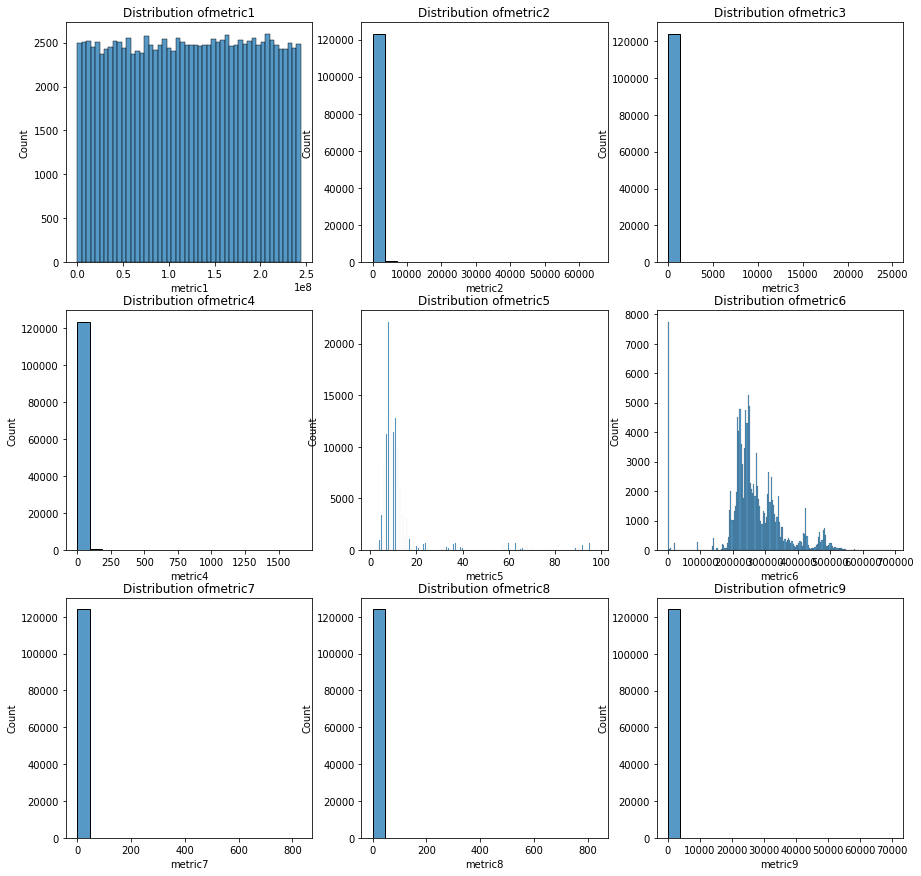

In [ ]:
plt.figure(figsize = (3*5, 3*5))

mask = df.failure == 0

for i, col in enumerate(['metric1','metric2','metric3','metric4','metric5','metric6','metric7','metric8','metric9',]):
    plt.subplot(3,3,i+1)
    sns.histplot(data = df.loc[mask], x = col)
    plt.title(f"Distribution of{col}")

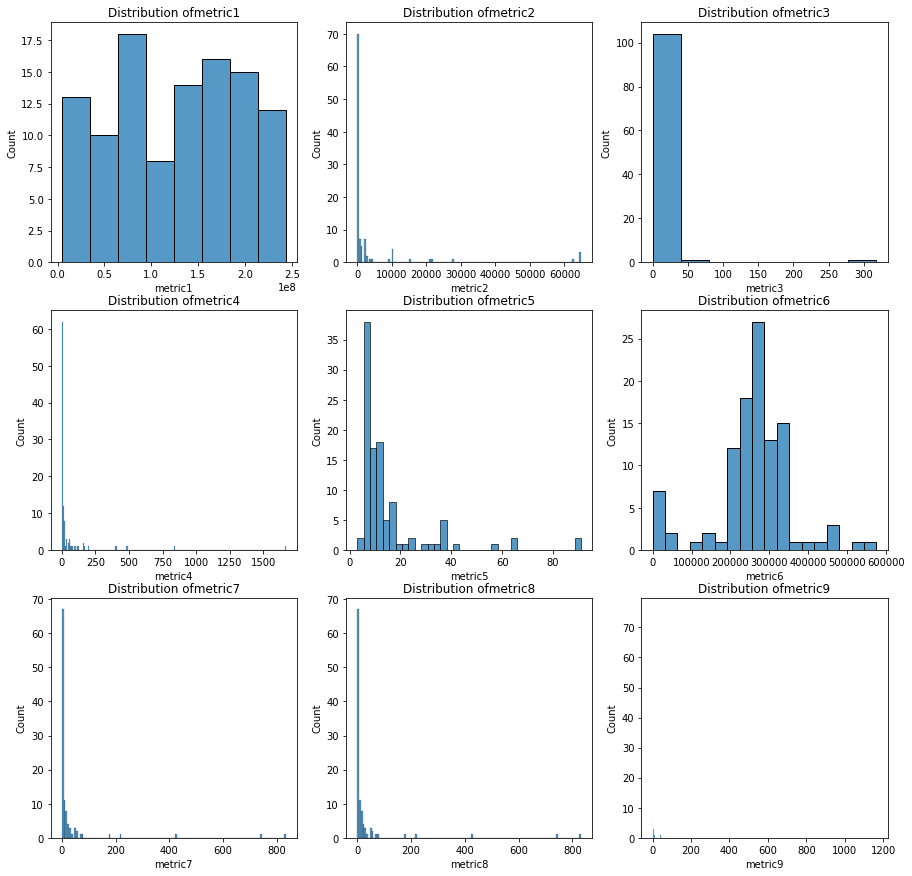

In [ ]:
plt.figure(figsize = (3*5, 3*5))

mask = df.failure == 1

for i, col in enumerate(['metric1','metric2','metric3','metric4','metric5','metric6','metric7','metric8','metric9',]):
    plt.subplot(3,3,i+1)
    sns.histplot(data = df.loc[mask], x = col)
    plt.title(f"Distribution of{col}")

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_month'] = df['date'].dt.day
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x>5 else 0)

df = df.drop(['date'], axis = 1)

In [ ]:
df.head(20)

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,device_model,month,week,day_of_week,day_of_month,is_weekend
0,0,215630672,55,0,52,6,407438,0,0,7,S1F0,1,1,3,1,0
1,0,61370680,0,3,0,6,403174,0,0,0,S1F0,1,1,3,1,0
2,0,173295968,0,0,0,12,237394,0,0,0,S1F0,1,1,3,1,0
3,0,79694024,0,0,0,6,410186,0,0,0,S1F0,1,1,3,1,0
4,0,135970480,0,0,0,15,313173,0,0,3,S1F0,1,1,3,1,0
5,0,68837488,0,0,41,6,413535,0,0,1,S1F0,1,1,3,1,0
6,0,227721632,0,0,0,8,402525,0,0,0,S1F0,1,1,3,1,0
7,0,141503600,0,0,1,19,494462,16,16,3,S1F0,1,1,3,1,0
8,0,8217840,0,1,0,14,311869,0,0,0,S1F0,1,1,3,1,0
9,0,116440096,0,378,9,9,407905,0,0,170,S1F0,1,1,3,1,0


In [ ]:
df['device_model'].value_counts()

S1F0    33168
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Name: device_model, dtype: int64

In [ ]:
df = pd.get_dummies(df)
df.head()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,...,week,day_of_week,day_of_month,is_weekend,device_model_S1F0,device_model_S1F1,device_model_W1F0,device_model_W1F1,device_model_Z1F0,device_model_Z1F1
0,0,215630672,55,0,52,6,407438,0,0,7,...,1,3,1,0,1,0,0,0,0,0
1,0,61370680,0,3,0,6,403174,0,0,0,...,1,3,1,0,1,0,0,0,0,0
2,0,173295968,0,0,0,12,237394,0,0,0,...,1,3,1,0,1,0,0,0,0,0
3,0,79694024,0,0,0,6,410186,0,0,0,...,1,3,1,0,1,0,0,0,0,0
4,0,135970480,0,0,0,15,313173,0,0,3,...,1,3,1,0,1,0,0,0,0,0


# Logistic Regression Classifier

In [ ]:
xdata = df.copy()
xdata.drop('failure', axis =1, inplace = True)

ydata = df['failure']

from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(xdata, ydata, test_size = 0.25, random_state = 10)

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_tr, y_tr)
y_pre = LR.predict(x_te)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_te, y_pre)
# precision = precision_score(y_te, y_pre)
recall = recall_score(y_te, y_pre)
f1 = f1_score(y_te, y_pre)

print(accuracy, recall, f1)

0.9992917163001835 0.0 0.0


In [ ]:
df['failure'].value_counts()

0    124136
1       106
Name: failure, dtype: int64

# Unbalance Issue

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = df.copy()
X.drop('failure', axis =1, inplace = True)
Y = df['failure']

rus = RandomUnderSampler()
X_resampled, Y_resampled = rus.fit_resample(X,Y)

Y_resampled.value_counts()

0    106
1    106
Name: failure, dtype: int64

# Model Implementation

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled,Y_resampled, test_size = 0.2, random_state = 10)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def evaluate_model(x_train, y_train, x_test, y_test):
    # Define a list of classifiers
    classifiers = [
        GradientBoostingClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        ExtraTreesClassifier(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        GaussianNB(),
        BernoulliNB(),
        SVC(),
        LogisticRegression(),
        SGDClassifier(),
    ]


    classifier_names = [
        'GradientBoost',
        'RandomForest',
        'AdaBoost',
        'ExtraTrees',
        'DecisionTree',
        'KNeighbors',
        'GaussianNB',
        'BernoulliNB',
        'SVC',
        'LogisticRegression',
        'SGD',
    ]


    metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=classifier_names)


    for i, clf in enumerate(classifiers):
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        metrics.loc[classifier_names[i], 'Accuracy'] = accuracy
        metrics.loc[classifier_names[i], 'Precision'] = precision
        metrics.loc[classifier_names[i], 'Recall'] = recall
        metrics.loc[classifier_names[i], 'F1'] = f1

    metrics = metrics.sort_values(by = 'Accuracy', ascending = False)

    return metrics

metrics = evaluate_model (x_train, y_train, x_test, y_test)
metrics

,Accuracy,Precision,Recall,F1
LogisticRegression,0.837209,0.722222,0.866667,0.787879
ExtraTrees,0.72093,0.565217,0.866667,0.684211
BernoulliNB,0.72093,0.588235,0.666667,0.625
SGD,0.72093,0.578947,0.733333,0.647059
SVC,0.604651,0.458333,0.733333,0.564103
AdaBoost,0.581395,0.448276,0.866667,0.590909
KNeighbors,0.534884,0.4,0.666667,0.5
DecisionTree,0.511628,0.411765,0.933333,0.571429
GradientBoost,0.465116,0.388889,0.933333,0.54902
RandomForest,0.418605,0.375,1.0,0.545455
